In [29]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(2003)

In [30]:
heart <- read_csv("heart.csv") %>%
mutate(cp = as_factor(cp)) %>%
select(age, sex, chol, cp)
heart

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trtbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalachh = col_double(),
  exng = col_double(),
  oldpeak = col_double(),
  slp = col_double(),
  caa = col_double(),
  thall = col_double(),
  output = col_double()
)



age,sex,chol,cp
<dbl>,<dbl>,<dbl>,<fct>
63,1,233,3
37,1,250,2
41,0,204,1
⋮,⋮,⋮,⋮
68,1,193,0
57,1,131,0
57,0,236,1


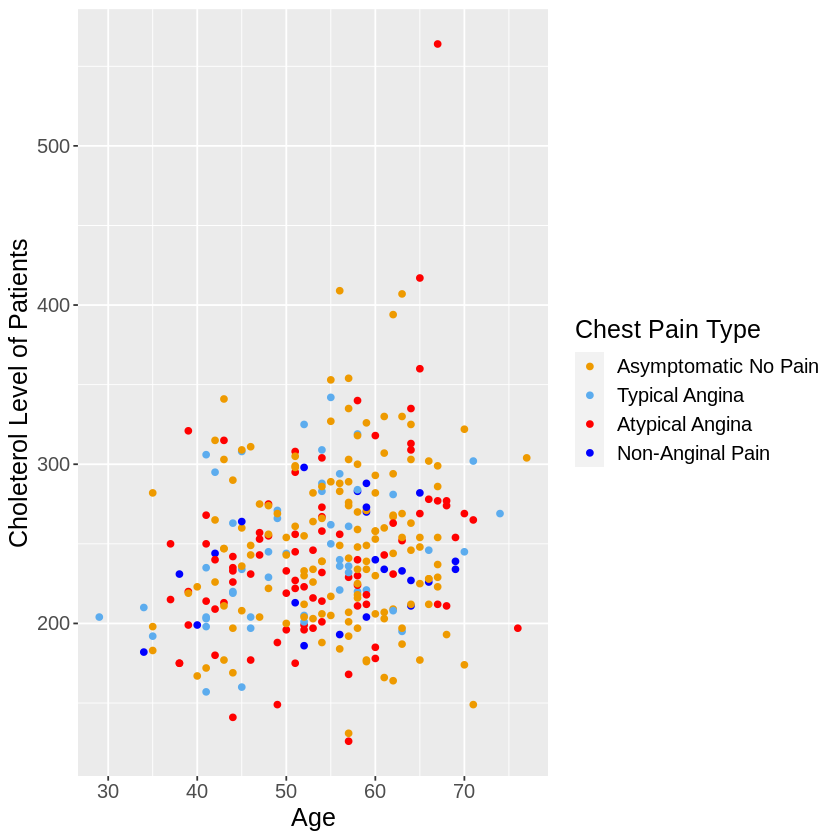

In [37]:
heart_plot <- heart %>%
ggplot(aes(x = age, y = chol)) +
geom_point(aes(color = cp)) +
labs(x = "Age",
    y = "Choleterol Level of Patients",
    color = "Chest Pain Type") +
    scale_color_manual(labels = c("Asymptomatic No Pain", "Typical Angina", "Atypical Angina", "Non-Anginal Pain"),
                      values = c("orange2", "steelblue2", "red", "blue"))+ 
  theme(text = element_text(size = 15))
                               
    
heart_plot


In [35]:
heart_split <- initial_split(heart, prop = 3/4, strata = cp)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = ) %>%
set_engine("kknn") %>%
set_mode("classification")

heart_recipe <- recipe(cp ~ chol + age, data = heart_training) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

heart_fit <- workflow() %>%
add_model(knn_spec) %>%
add_recipe(heart_recipe) %>%
fit(heart_training)

heart_predict <- predict(heart_fit, heart_testing) %>%
bind_cols(heart_testing) %>%
filter(.pred_class == cp)

heart_predict

ERROR: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...): 'x' must be atomic


Timing stopped at: 0.006 0 0.007



In [33]:
heart_train_vfold <- vfold_cv(heart_training, v = 5, strata = cp)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

heart_recipe <- recipe(cp ~ chol + age, data = heart_training) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

heart_fit <- workflow() %>%
add_model(knn_spec) %>%
add_recipe(heart_recipe) %>%
fit_resamples(resamples = heart_train_vfold) %>%
collect_metrics()

k_vals <- tibble(k = 1:303)

heart_cv_result <- workflow() %>%
add_model(knn_spec) %>%
add_recipe(heart_recipe) %>%
tune_grid(resamples = heart_train_vfold, grid = k_vals) %>%
collect_metrics()

accuracy <- heart_cv_result %>%
filter(.metric == "accuracy")

accuracy


x Fold1: model: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...

x Fold2: model: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...

x Fold3: model: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...

x Fold4: model: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...

x Fold5: model: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...

Warning message:
“All models failed in [fit_resamples()]. See the `.notes` column.”


ERROR: Error: All of the models failed. See the .notes column.
